In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

In [51]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [52]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
# feature names as a list
col = train_data.columns
print(col)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [54]:
list = ['PassengerId']
train_data = train_data.drop(list, axis = 1)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dead:  549
Survived:  342


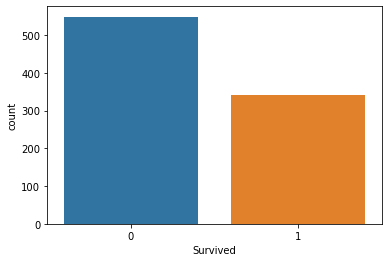

In [55]:
axs = sns.countplot(train_data.Survived, label="Count")
D, S = train_data.Survived.value_counts()
print("Dead: ", D)
print("Survived: ", S)

In [56]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_train_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_train_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


c:\users\yash\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


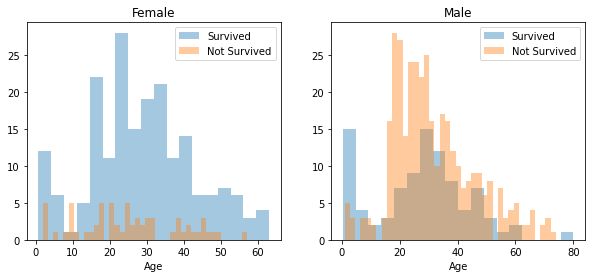

In [58]:
survived = "Survived"
not_survived = "Not Survived"

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[train_data['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

c:\users\yash\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


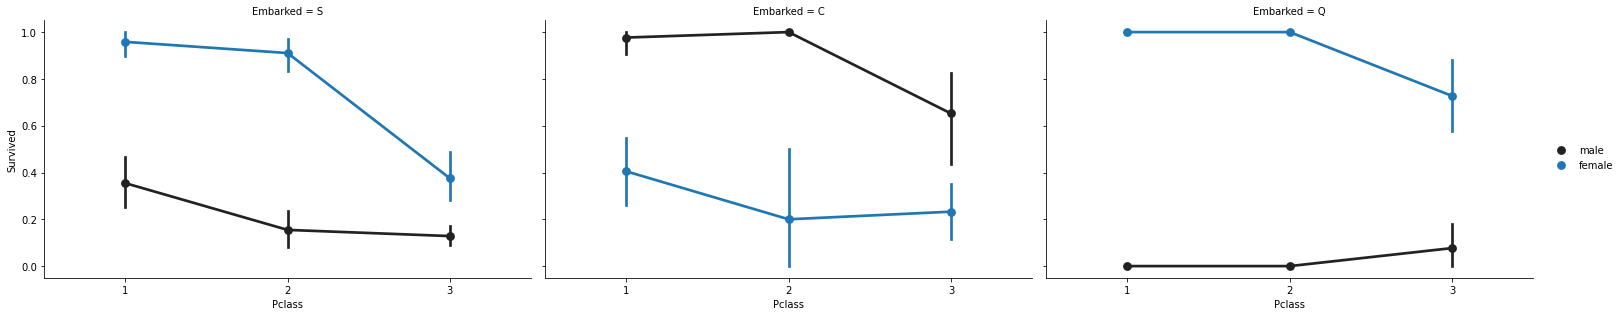

In [59]:
FacetGrid = sns.FacetGrid(train_data, col='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

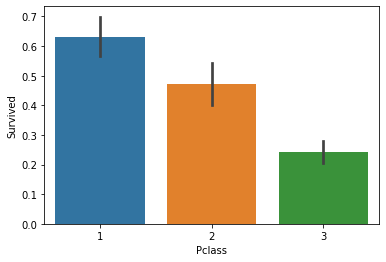

In [60]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

c:\users\yash\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


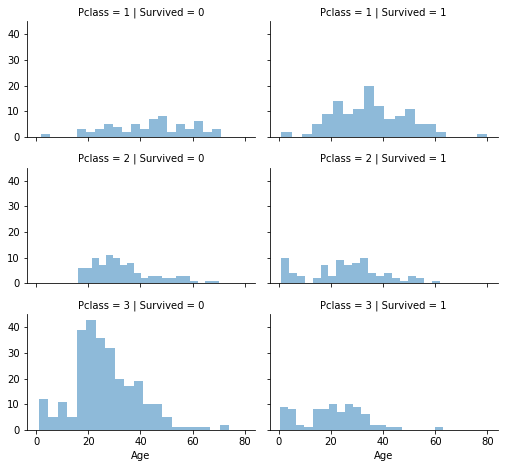

In [61]:
grid = sns.FacetGrid(train_data, col="Survived", row="Pclass", size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [62]:
data = [train_data, test_data]
for df in data:
    df['relatives'] = df['SibSp'] + df['Parch']
    df.loc[df['relatives'] > 0, 'not_alone'] = 0
    df.loc[df['relatives'] == 0, 'not_alone'] = 1
    df['not_alone'] = df['not_alone'].astype(int)

train_data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [63]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,relatives,not_alone
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,0.602694
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


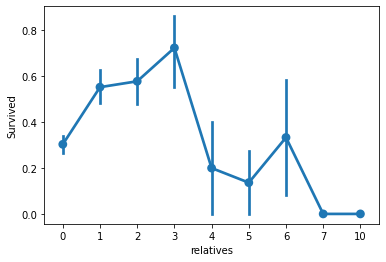

In [64]:
axes = sns.pointplot('relatives','Survived', data=train_data, aspect = 2.5 )

In [65]:
data = [train_data, test_data]

for df in data:
    df['Ticket Initial'] = df['Ticket'].map(lambda x: 'OO' if x.split()[0].isdecimal() else x.split()[0])

train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Ticket Initial
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,A/5
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,PC
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,STON/O2.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,OO
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,OO


In [66]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for df in data:
    df['Cabin'] = df['Cabin'].fillna('U0')
    df['Deck'] = df['Cabin'].map(lambda x: re.compile('([a-zA-Z]+)').search(x).group())
    df['Deck'] = df['Deck'].map(deck)
    df['Deck'] = df['Deck'].fillna(0)
    df['Deck'] = df['Deck'].astype(int)
    
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)    

In [67]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Ticket Initial,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,A/5,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,PC,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,STON/O2.,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,OO,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,OO,8


In [68]:
data = [train_data, test_data]

for df in data:
    mean = train_data['Age'].mean()
    std = train_data['Age'].std()
    is_null = df['Age'].isnull().sum()
    
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_copy = df["Age"].copy()
    age_copy[np.isnan(age_copy)] = rand_age
    df['Age'] = age_copy
    df['Age'] = df['Age'].astype(int)
    
train_data['Age'].isnull().sum()

0

In [69]:
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [70]:
data = [train_data, test_data]

for df in data:
    df['Embarked'] = df['Embarked'].fillna('S')

train_data['Age'].isnull().sum()

0

In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Name            891 non-null    object 
 3   Sex             891 non-null    object 
 4   Age             891 non-null    int32  
 5   SibSp           891 non-null    int64  
 6   Parch           891 non-null    int64  
 7   Ticket          891 non-null    object 
 8   Fare            891 non-null    float64
 9   Embarked        891 non-null    object 
 10  relatives       891 non-null    int64  
 11  not_alone       891 non-null    int32  
 12  Ticket Initial  891 non-null    object 
 13  Deck            891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(5)
memory usage: 87.1+ KB


In [72]:
data = [train_data, test_data]

for df in data:
    df['Fare'] = df['Fare'].fillna(0)
    df['Fare'] = df['Fare'].astype(int)

In [73]:
data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for df in data:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                       'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
    df['Title'] = df['Title'].map(titles)
    df['Title'] = df['Title'].fillna(0)
    
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [74]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Ticket Initial,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,A/5,8,1
1,1,1,female,38,1,0,PC 17599,71,C,1,0,PC,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,STON/O2.,8,2
3,1,1,female,35,1,0,113803,53,S,1,0,OO,3,3
4,0,3,male,35,0,0,373450,8,S,0,1,OO,8,1


In [75]:
genders = {"male": 0, "female": 1}
data = [train_data, test_data]

for df in data:
    df['Sex'] = df['Sex'].map(genders)

In [76]:
train_data['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [77]:
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [78]:
embd = {"S": 0, "C": 1, "Q": 2}
data = [train_data, test_data]

for df in data:
    df['Embarked'] = df['Embarked'].map(embd)

In [79]:
data = [train_data, test_data]

for df in data:
    encoding = df.groupby('Embarked').size()
    encoding = encoding / len(df)
    df['enc'] = df['Embarked'].map(encoding)
    
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Ticket Initial,Deck,Title,enc
0,0,3,0,22,1,0,7,0,1,0,A/5,8,1,0.725028
1,1,1,1,38,1,0,71,1,1,0,PC,3,3,0.188552
2,1,3,1,26,0,0,7,0,0,1,STON/O2.,8,2,0.725028
3,1,1,1,35,1,0,53,0,1,0,OO,3,3,0.725028
4,0,3,0,35,0,0,8,0,0,1,OO,8,1,0.725028


In [80]:
train_data = train_data.drop(['Embarked'], axis=1)
test_data = test_data.drop(['Embarked'], axis=1)

In [81]:
data = [train_data, test_data]
for df in data:
    df['Age'] = df['Age'].astype(int)
    df.loc[ df['Age'] <= 11, 'Age'] = 0
    df.loc[(df['Age'] > 11) & (df['Age'] <= 18), 'Age'] = 1
    df.loc[(df['Age'] > 18) & (df['Age'] <= 22), 'Age'] = 2
    df.loc[(df['Age'] > 22) & (df['Age'] <= 27), 'Age'] = 3
    df.loc[(df['Age'] > 27) & (df['Age'] <= 33), 'Age'] = 4
    df.loc[(df['Age'] > 33) & (df['Age'] <= 40), 'Age'] = 5
    df.loc[(df['Age'] > 40) & (df['Age'] <= 66), 'Age'] = 6
    df.loc[ df['Age'] > 66, 'Age'] = 6

train_data['Age'].value_counts()

6    175
4    166
3    142
5    137
2    115
1     88
0     68
Name: Age, dtype: int64

In [82]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,not_alone,Ticket Initial,Deck,Title,enc
0,0,3,0,2,1,0,7,1,0,A/5,8,1,0.725028
1,1,1,1,5,1,0,71,1,0,PC,3,3,0.188552
2,1,3,1,3,0,0,7,0,1,STON/O2.,8,2,0.725028
3,1,1,1,5,1,0,53,1,0,OO,3,3,0.725028
4,0,3,0,5,0,0,8,0,1,OO,8,1,0.725028


In [83]:
pd.qcut(train_data['Fare'], 4)

pd.cut(train_data['Fare'],4)

train_data['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [84]:
data = [train_data, test_data]

for df in data:
    df.loc[ df['Fare'] <= 7.0, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.0) & (df['Fare'] <= 14.0), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.0) & (df['Fare'] <= 31.0), 'Fare']   = 2
    df.loc[(df['Fare'] > 31.0) & (df['Fare'] <= 99.0), 'Fare']   = 3
    df.loc[(df['Fare'] > 99.0) & (df['Fare'] <= 250.0), 'Fare']   = 4
    df.loc[ df['Fare'] > 250.0, 'Fare'] = 5
    df['Fare'] = df['Fare'].astype(int)

In [85]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,not_alone,Ticket Initial,Deck,Title,enc
0,0,3,0,2,1,0,0,1,0,A/5,8,1,0.725028
1,1,1,1,5,1,0,3,1,0,PC,3,3,0.188552
2,1,3,1,3,0,0,0,0,1,STON/O2.,8,2,0.725028
3,1,1,1,5,1,0,3,1,0,OO,3,3,0.725028
4,0,3,0,5,0,0,1,0,1,OO,8,1,0.725028


In [86]:
data = [train_data, test_data]

for df in data:
    df['Fare_Per_Person'] = df['Fare']/(df['relatives']+1)
    df['Fare_Per_Person'] = df['Fare_Per_Person'].astype(int)
    
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,not_alone,Ticket Initial,Deck,Title,enc,Fare_Per_Person
0,0,3,0,2,1,0,0,1,0,A/5,8,1,0.725028,0
1,1,1,1,5,1,0,3,1,0,PC,3,3,0.188552,1
2,1,3,1,3,0,0,0,0,1,STON/O2.,8,2,0.725028,0
3,1,1,1,5,1,0,3,1,0,OO,3,3,0.725028,1
4,0,3,0,5,0,0,1,0,1,OO,8,1,0.725028,1


In [90]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data = [train_data, test_data]

for df in data:
    le.fit(df['Ticket Initial'])
    df['Ticket Initial'] = le.transform(df['Ticket Initial'])

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,not_alone,Ticket Initial,Deck,Title,enc,Fare_Per_Person
0,0,3,0,2,1,0,0,1,0,4,8,1,0.725028,0
1,1,1,1,5,1,0,3,1,0,19,3,3,0.188552,1
2,1,3,1,3,0,0,0,0,1,38,8,2,0.725028,0
3,1,1,1,5,1,0,3,1,0,17,3,3,0.725028,1
4,0,3,0,5,0,0,1,0,1,17,8,1,0.725028,1


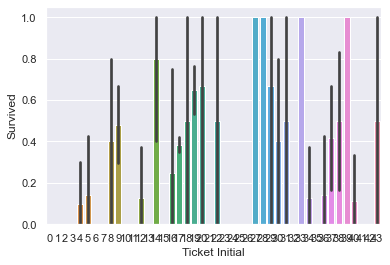

In [107]:
sns.barplot(x='Ticket Initial', y='Survived', data=train_data)

In [91]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

In [92]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

94.05


In [93]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.83146067 0.74157303 0.79775281 0.82022472 0.82022472
 0.79775281 0.76404494 0.86516854 0.82022472]
Mean: 0.8047315855181024
Standard Deviation: 0.03328661035506814


In [94]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.head(15)

,importance
feature,
Title,0.197
Sex,0.152
Age,0.145
Deck,0.081
Pclass,0.077
Ticket Initial,0.070
Fare,0.066
relatives,0.062
enc,0.046


In [95]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)

confusion_matrix(Y_train, predictions)

array([[478,  71],
       [102, 240]], dtype=int64)

In [96]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7717041800643086
Recall: 0.7017543859649122


In [97]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,not_alone,Ticket Initial,Deck,Title,enc,Fare_Per_Person
0,3,0,2,1,0,0,1,0,4,8,1,0.725028,0
1,1,1,5,1,0,3,1,0,19,3,3,0.188552,1
2,3,1,3,0,0,0,0,1,38,8,2,0.725028,0
3,1,1,5,1,0,3,1,0,17,3,3,0.725028,1
4,3,0,5,0,0,1,0,1,17,8,1,0.725028,1


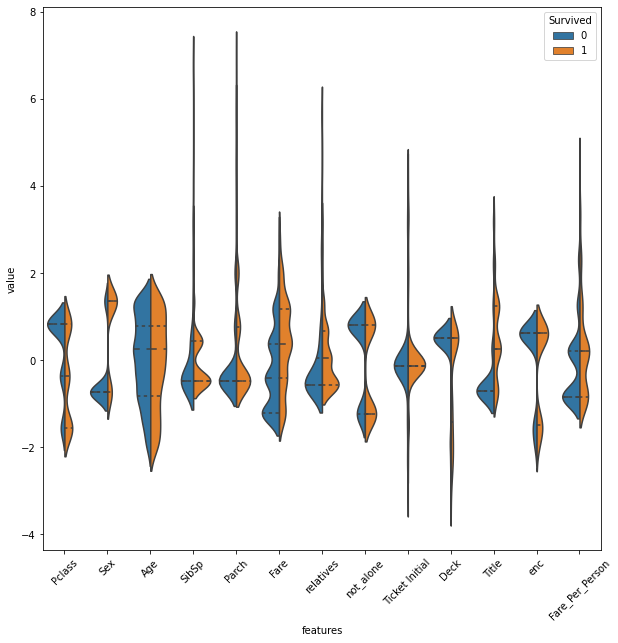

In [98]:
# first ten features
data_dia = Y_train
data = X_train
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([Y_train,data_n_2],axis=1)
data = pd.melt(data,id_vars="Survived",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Survived", data=data,split=True, inner="quart")
plt.xticks(rotation=45);

In [99]:
X_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
X_test_N = (X_test-X_test.mean())/(X_test.max()-X_test.min())

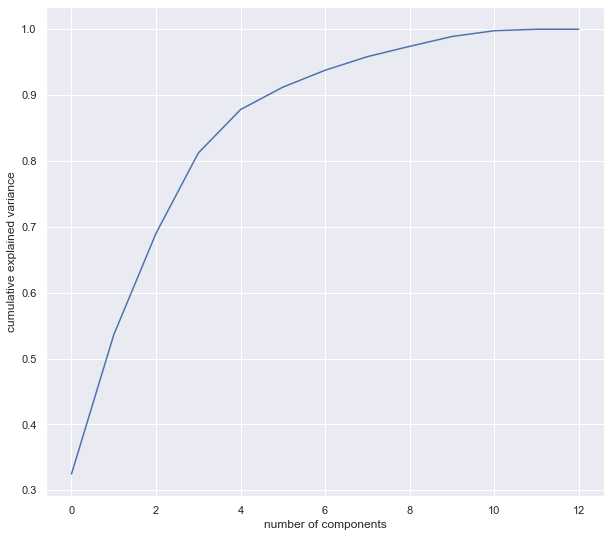

In [100]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_N)

sns.set()
plt.figure(1, figsize=(10, 9))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

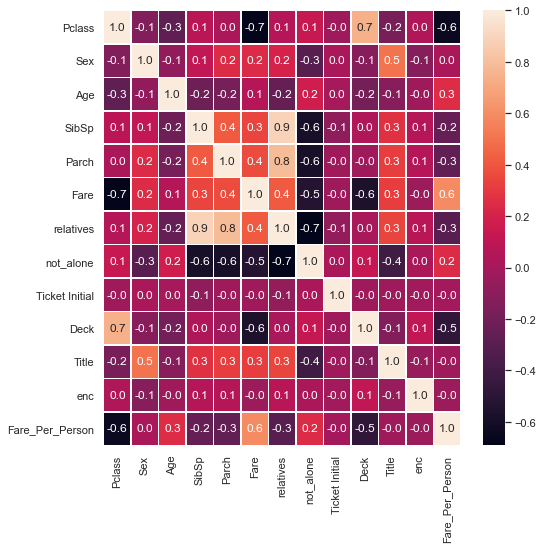

In [101]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [102]:
list = ['SibSp', 'Parch']
X_train = X_train.drop(list, axis = 1)
X_test = X_test.drop(list, axis = 1)

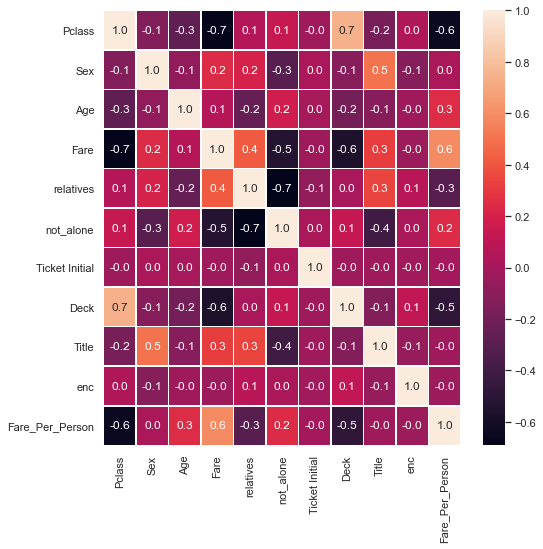

In [103]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [104]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

93.71


In [105]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.85393258 0.6741573  0.82022472 0.83146067 0.83146067
 0.82022472 0.75280899 0.86516854 0.84269663]
Mean: 0.806991260923845
Standard Deviation: 0.05463031811749762


In [106]:
Y_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
psid = test_data['PassengerId']

dict = {'PassengerId': psid, 'Survived': Y_prediction}
df_pred = pd.DataFrame(dict).set_index('PassengerId')
df_pred.head()
df_pred.to_csv('predictions.csv') 

In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70],
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35],
              "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.bestparams

In [108]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.38 %


In [109]:
Y_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [123]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.48

In [124]:
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [125]:
psid = test_data['PassengerId']

dict = {'PassengerId': psid, 'Survived': Y_pred}
df_pred = pd.DataFrame(dict).set_index('PassengerId')
df_pred.head()
df_pred.to_csv('predictions.csv') 

In [118]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

acc_knn

86.87

In [119]:
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,